# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [2]:
from sklearn import datasets
#from sklearn.preprocessing import StandardScaler

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
#X = StandardScaler().fit_transform(X)
y = pd.Series(data["target"])

X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols   
0    14.23        1.71  2.43               15.6      127.0           2.80  \
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue   
0        3.06                  0.28             2.29             5.64  1.04  \
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans=KMeans(n_clusters=8)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)
silhouette_8

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5369954815914436

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)
silhouette_8

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5489993239795675

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)
labels=kmeans.labels_

silhouette_8=silhouette_score(X, labels)
silhouette_8

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5711381937868838

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [9]:
%pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ------------------- ------------------ 143.4/282.6 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from yellowbrick.cluster import KElbowVisualizer

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\javir\anaco

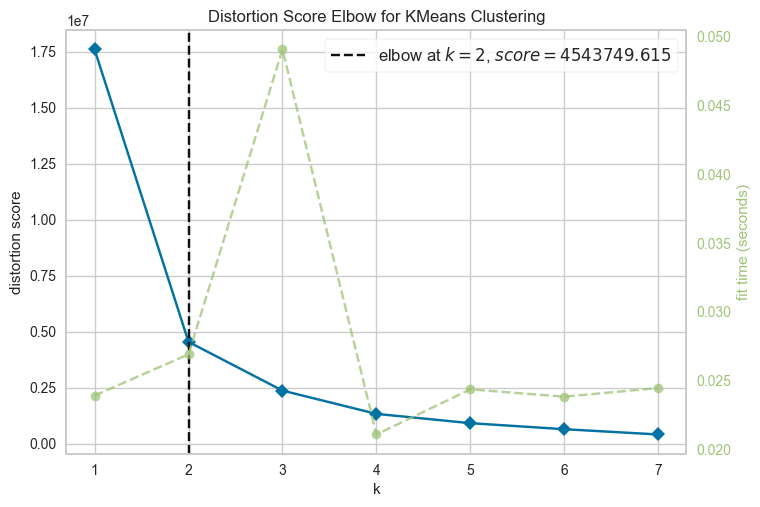

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:

model = KMeans()

visualizer = KElbowVisualizer(model, k=(1,8), metric='distortion')


visualizer.fit(X)


visualizer.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

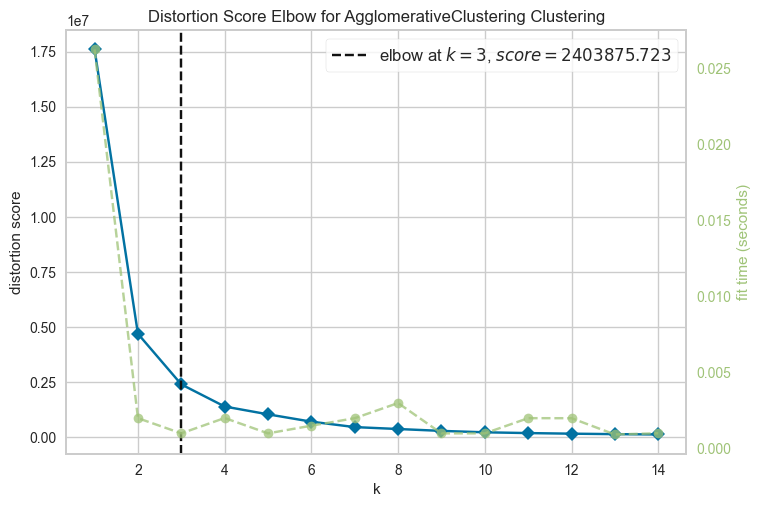

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from sklearn.cluster import AgglomerativeClustering


# crear el modelo AgglomerativeClustering
modelo_agg = AgglomerativeClustering(n_clusters=8)

# crear el objeto visualizador y ajustarlo a los datos
visual_agg = KElbowVisualizer(modelo_agg, k=(1,15))
visual_agg.fit(X)

# mostrar la gráfica
visual_agg.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


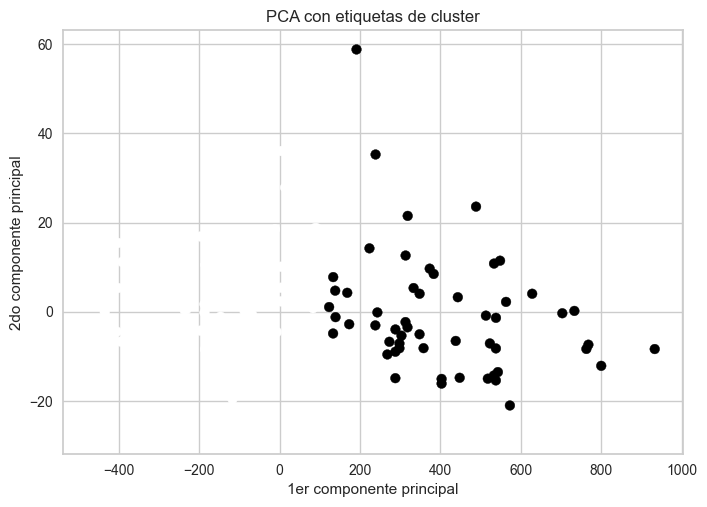

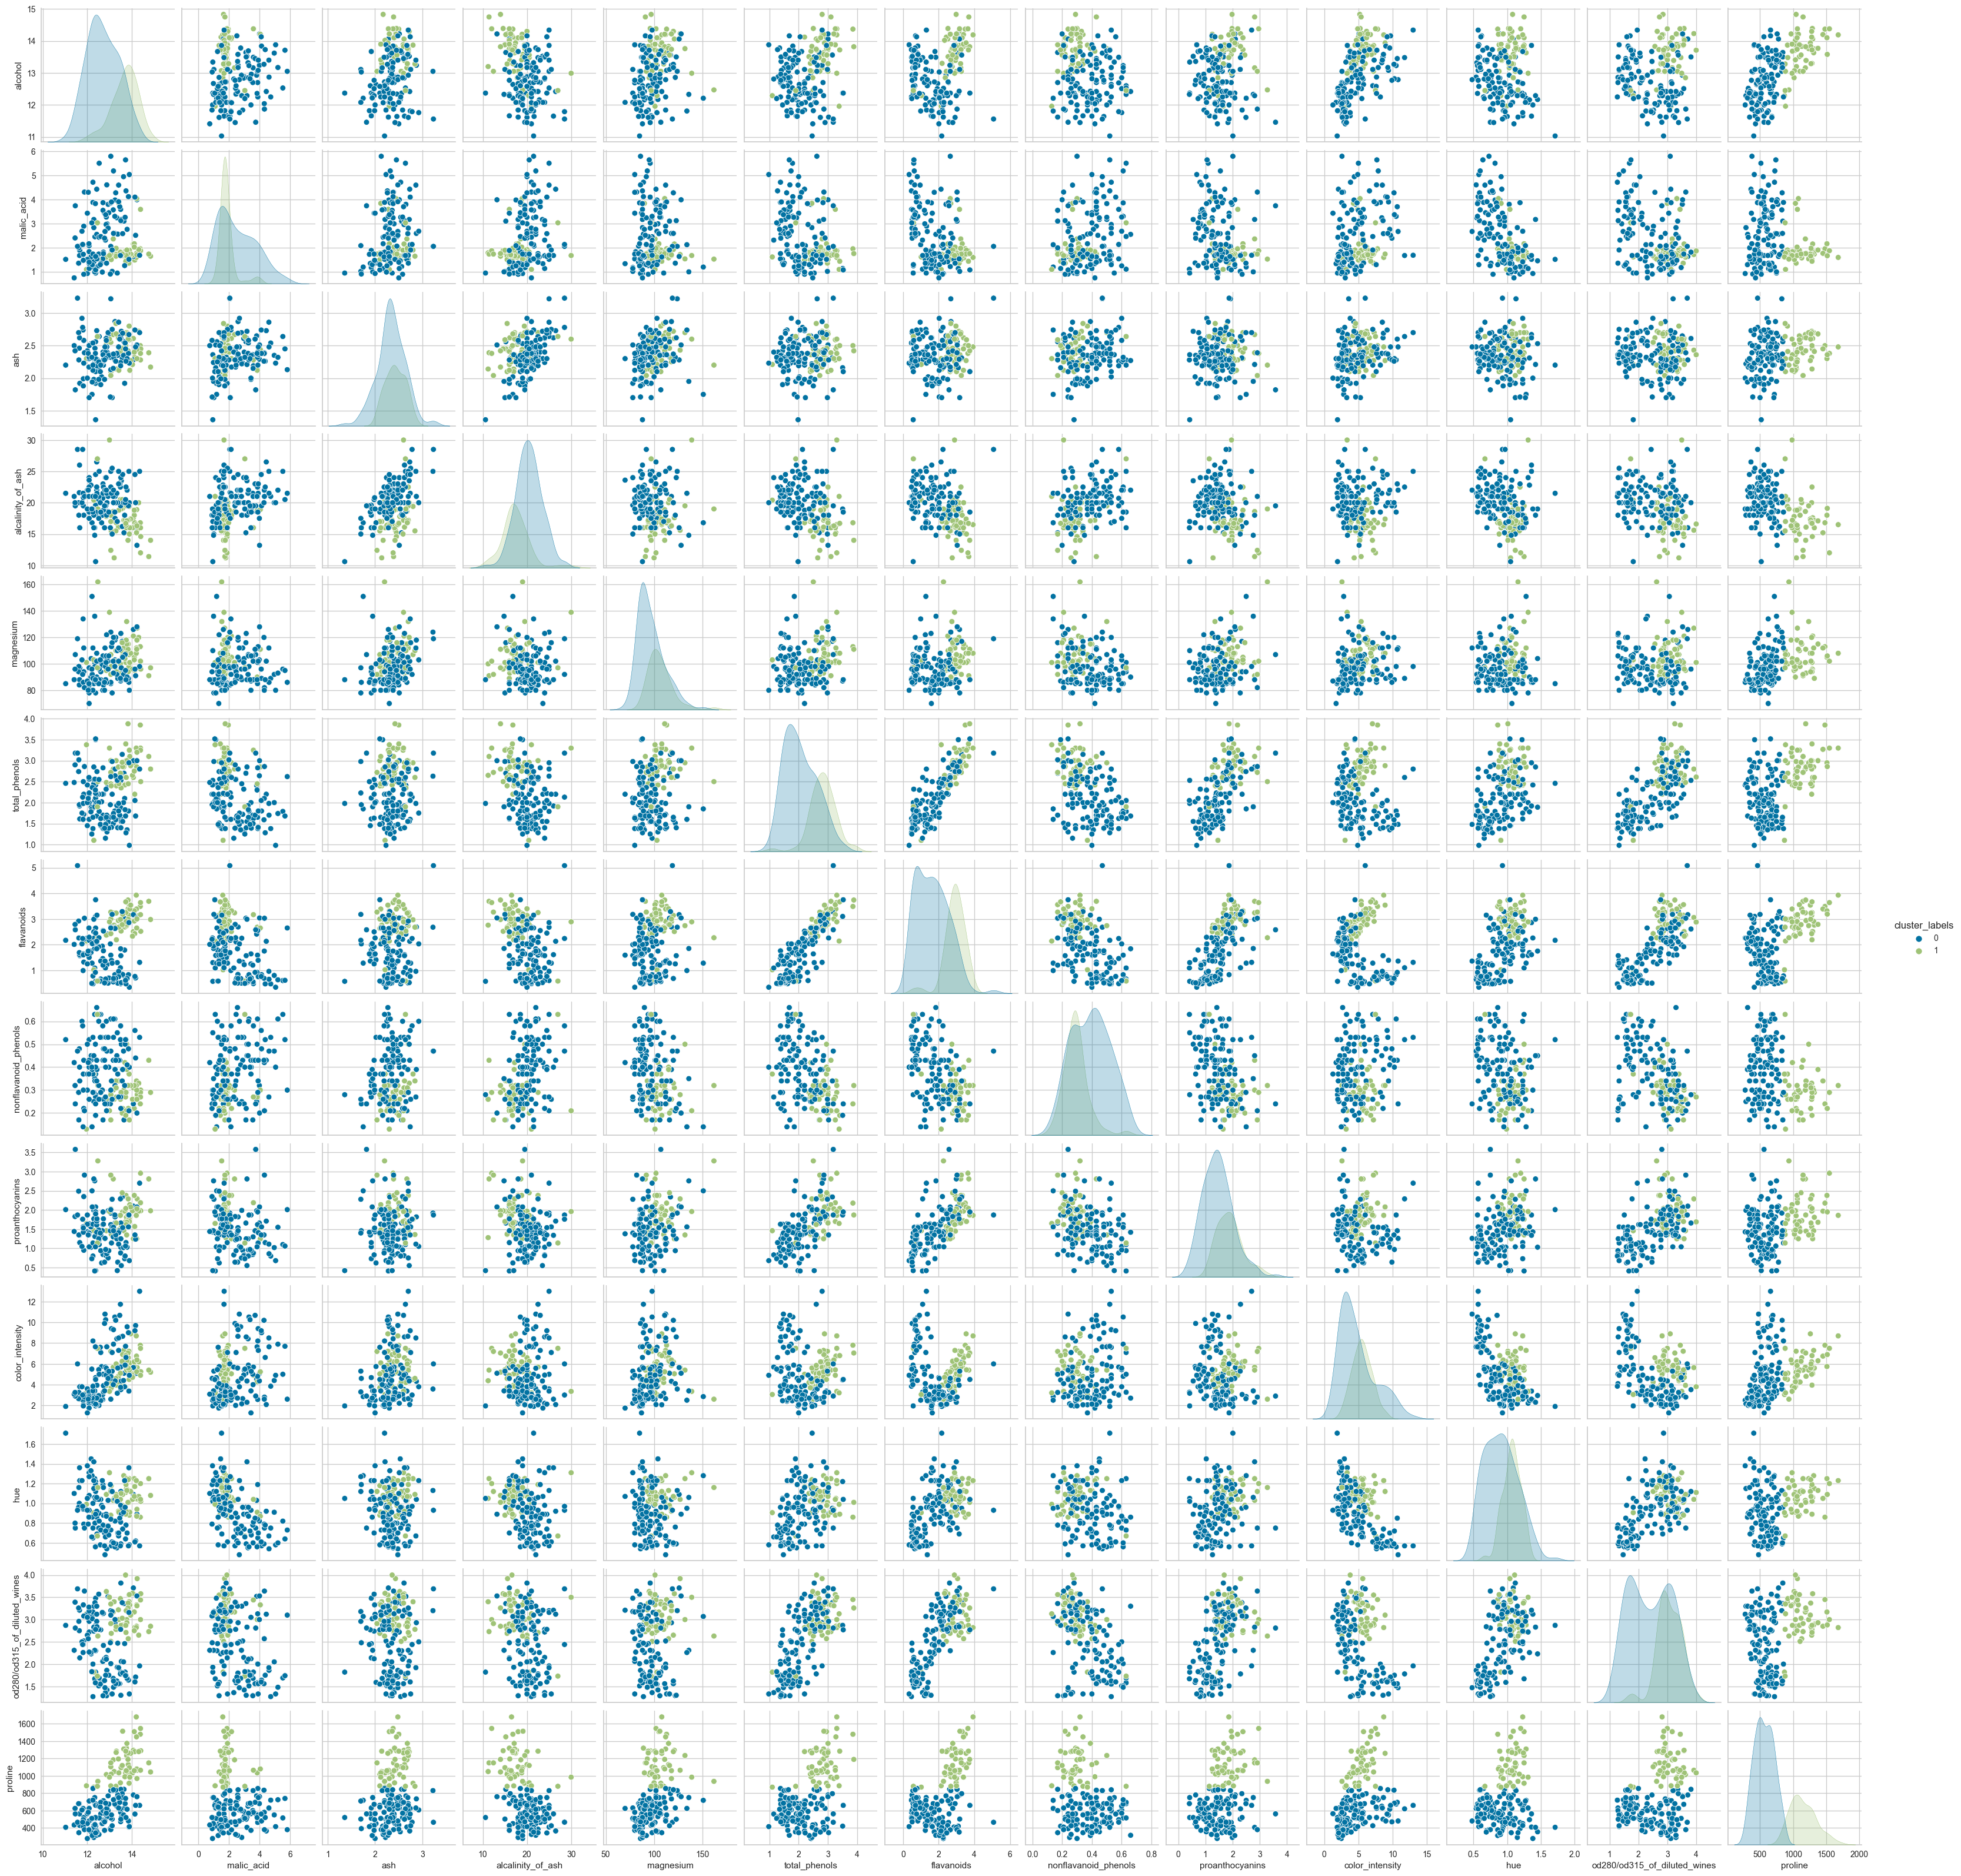

In [16]:
import seaborn as sns


kmeans_model = KMeans(n_clusters=2, random_state=42)

from sklearn.decomposition import PCA
kmeans_model.fit(X)
pca=PCA().fit(X)

pca_x=pca.transform(X)

pca_x.shape
plt.scatter(pca_x[:, 0], pca_x[:, 1], c=kmeans_model.labels_)
plt.xlabel('1er componente principal')
plt.ylabel('2do componente principal')
plt.title('PCA con etiquetas de cluster')
plt.show()

X['cluster_labels'] = kmeans_model.labels_

sns.pairplot(X, hue='cluster_labels')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

c:\Users\javir\anaconda3\envs\ETL\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


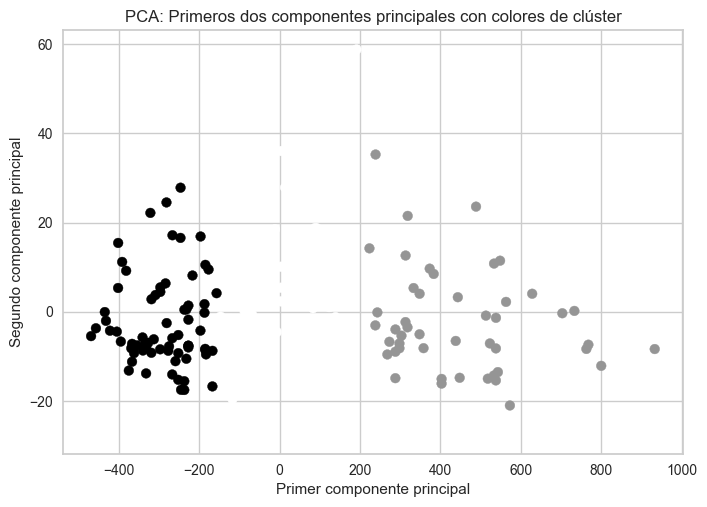

In [22]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Cargar los datos
wine = load_wine()
data = wine.data

# Aplicar K-Means para obtener las asignaciones de clúster
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.labels_

# Aplicar PCA a los datos
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Crear el gráfico de dispersión
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.title('PCA: Primeros dos componentes principales con colores de clúster')
plt.show()





## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

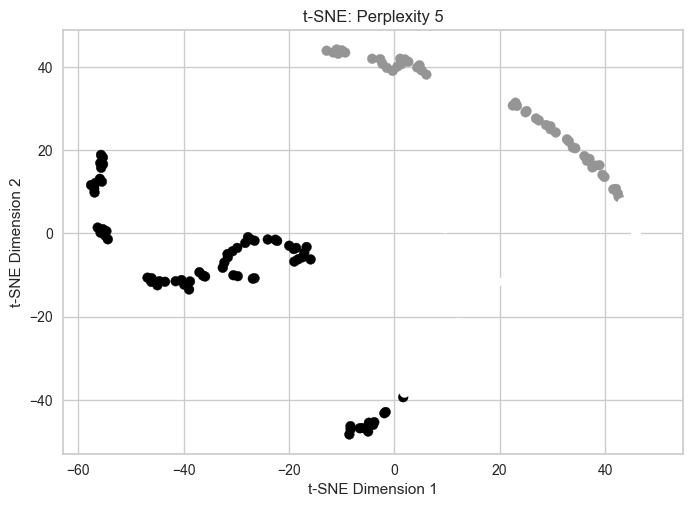

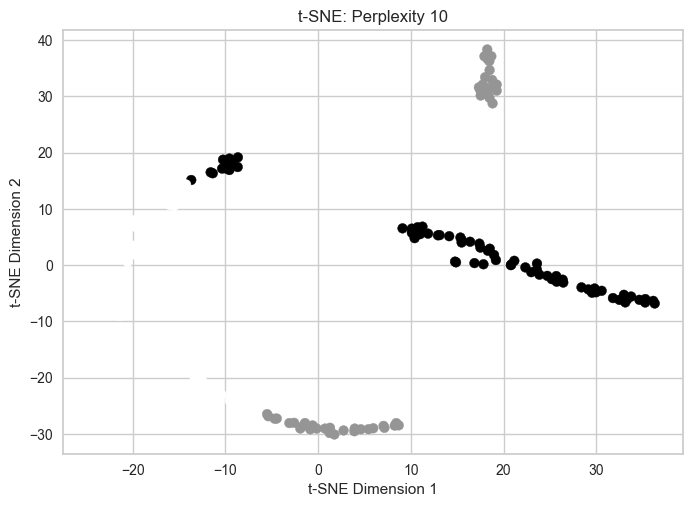

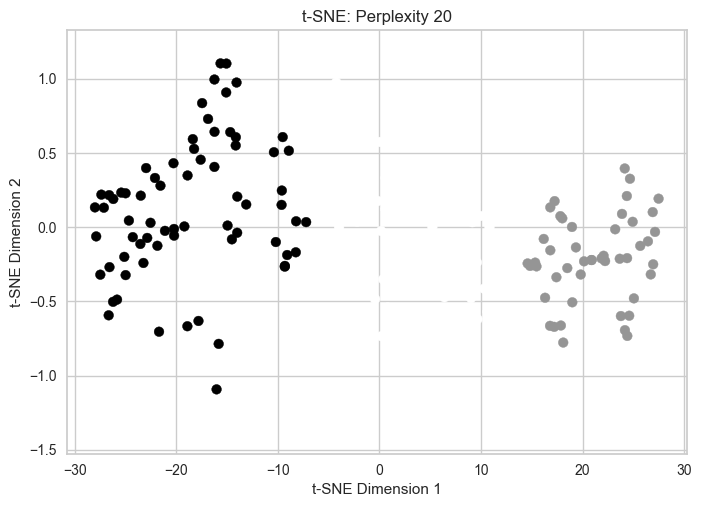

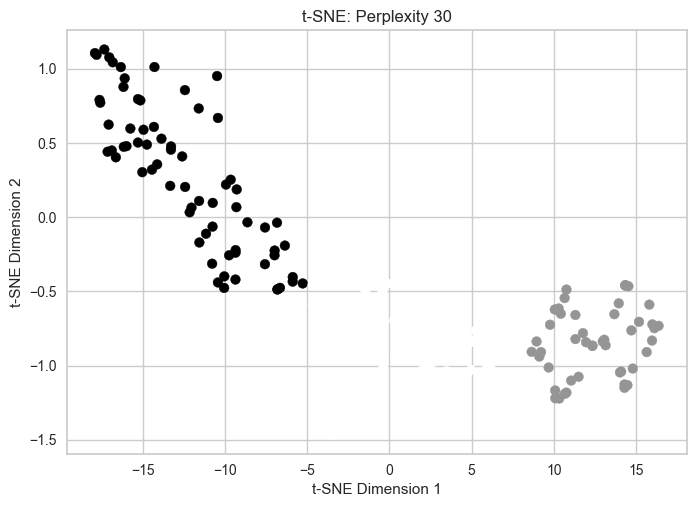

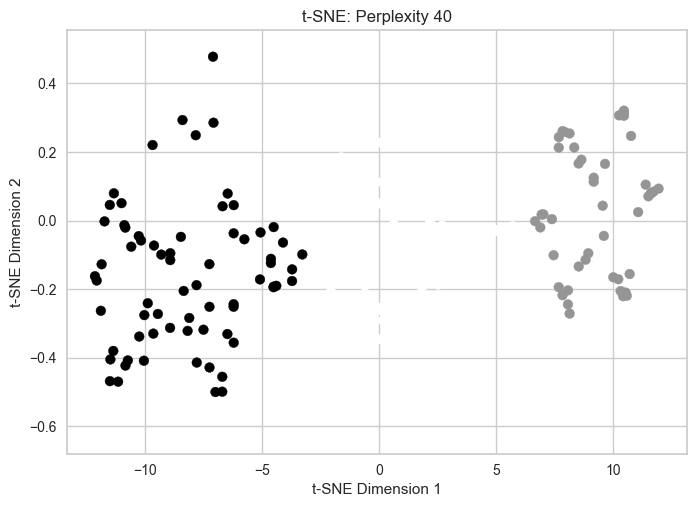

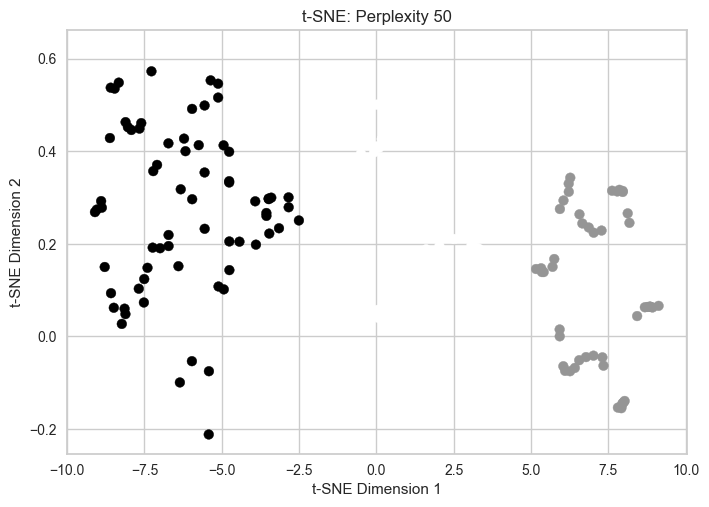

In [23]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

perplexities = [5, 10, 20, 30, 40, 50]

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    tsne_data = tsne.fit_transform(data)
    
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE: Perplexity {perplexity}')
    plt.show()

